<h2>Optimisation M1 - TP2</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On considère la fonction quadratique suivante définie sur $[-5,5]\times[-5,5]$ par :
$$
f(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - x_1 + 20.
$$

1) Ecrire en Python la fonction $f$, son gradient ainsi que la matrice symétrique $A$ et le vecteur $b$ tels que 
$$
f(x) = \frac12 \langle Ax, x\rangle - \langle b, x \rangle + c.
$$

In [2]:
def f(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] + x[0] - x[1] + 20
def gradf(x):
    gx = 2*x[0] + x[1] + 1
    gy = 4*x[1] + x[0] - 1
    return np.array([gx, gy])
A, b = np.array([[2, 1], [1, 4]]), np.array([-1, 1])
dom = [-5, 5, -5, 5]

2) Tracer les lignes de niveau de $f$ sur son domaine de définition

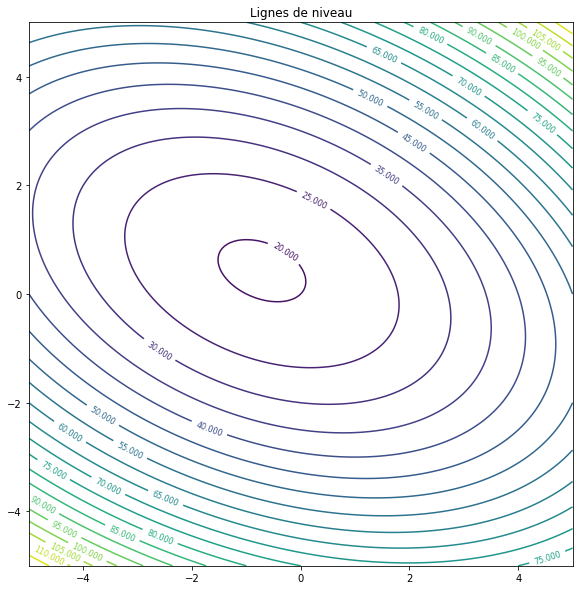

In [3]:
# Definition des grilles et evaluation de f
X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(X, Y, Z, 20)
ax.clabel(CS, fontsize = 8)
ax.set_title('Lignes de niveau')
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

<h3>I) Algorithme de descente de gradient à pas optimal</h3>

3) Ecrire une fonction $\mbox{descente_gradient_pas_optimal}$, qui prend en argument un point de départ $x^{(0)}$, la matrice $A$, le vecteur $b$ et une tolérance $\varepsilon$, qui représente l'algorithme de descente de gradient à pas optimal. Cette fonction renverra le point final obtenu ainsi que la liste des itérés.

In [4]:
def descente_gradient_pas_optimal(x0, A, b, epsilon):
    # renvoie le dernier itéré et la liste des itérés de la méthode de descente de gradient par pas optimal
    x = x0
    x_list = [x0]
    gx = np.dot(A, x) - b
    while np.linalg.norm(gx) > epsilon:
        t = np.dot(gx, gx)/np.dot(np.dot(A, -gx), -gx) # valeur du pas optimal (on a l'expression pour une fonctionnelle quadratique)
        x = x - t*gx
        x_list.append(x)
        gx = np.dot(A, x) - b
    
    return x, x_list

4) On prendra $x^{(0)}=(4,-4)$. Supperposer la trajectoire donnée par l'algorithme au graphe des lignes de niveau de $f$. Commenter la trajectoire.

In [5]:
x0 = np.array([4, -4])
xstar_approx_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-3)

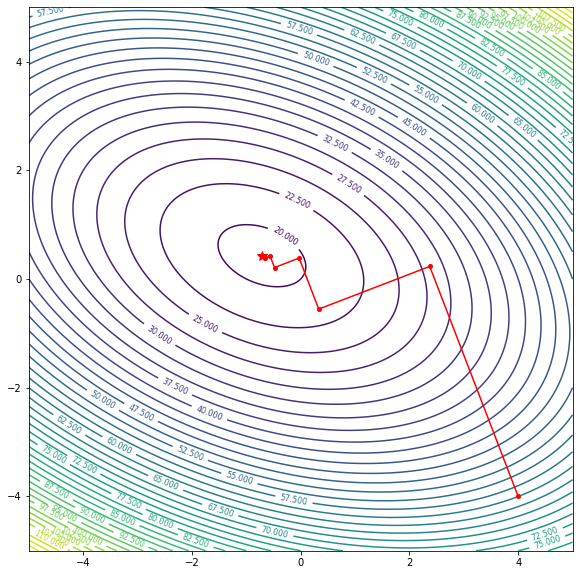

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(X, Y, Z, 40)
ax.clabel(CS, fontsize = 8)
X_list_optimal = [x_list_optimal[i][0] for i in range(len(x_list_optimal))]
Y_list_optimal = [x_list_optimal[i][1] for i in range(len(x_list_optimal))]
plt.plot(X_list_optimal, Y_list_optimal, marker = "o", ms = 4.0, color = "red")
plt.plot(xstar_approx_optimal[0], xstar_approx_optimal[1], marker = '*', ms = 10.0, color = "r")
ax.set_aspect('equal', adjustable = 'box')

On remarque, comme vu en cours, que la trajectoire est orthogale aux lignes de niveau (deux gradients successifs sont orthogonaux).

5) Illustrer la convergence linéaire de l'algorithme.

In [7]:
xstar_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-10)
xstar_approx_optimal, x_list_optimal = descente_gradient_pas_optimal(x0, A, b, 1e-6)

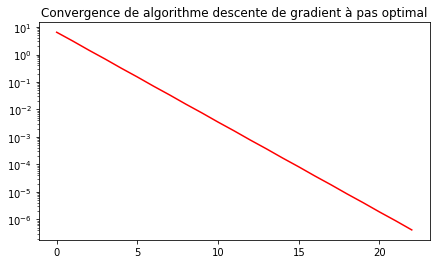

In [8]:
fig = plt.figure(figsize = (7, 4))
plt.semilogy([np.linalg.norm(x_list_optimal[i] - xstar_optimal) for i in range(len(x_list_optimal))], color = 'red') # on représente l'erreur entre chaque itéré et la
# valeur limite obtenue via la fonction semilogy qui met l'axe des ordonnées en échelle log.
plt.title('Convergence de algorithme descente de gradient à pas optimal')
plt.show()

<h3>II) Algorithme de descente de gradient par rebroussement</h3>

6) Ecrire une fonction $\mbox{rebroussement}$ qui prend en argument un point $x$, la fonction $f$, une direction de descente $d$, le produit scalaire $\langle \nabla f(x), d\rangle$, $\alpha$ et $\beta$, et qui représente l'algorithme de calcul d'un pas de descente par méthode de rebroussement. On veillera à évaluer le moins possible la fonction $f$.

In [9]:
def rebroussement(x, f, d, gxd, alpha, beta):
    # renvoie le pas de descente via la méthode du rebroussement
    t = 1
    fx = f(x) # on stocke la valeur de f en x dans une variable pour éviter de recalculer f(x) à chaque itération
    while f(x + t*d) >= fx + alpha*t*gxd: # on voit que l'on a une évaluation de f à chaque itération
        t = beta*t
    return t

7) Ecrire une fonction $\mbox{descente_gradient_par_rebroussement}$, qui prend en argument un point de départ $x^{(0)}$, $f$, le gradient de $f$, $\alpha$, $\beta$ et une tolérance $\varepsilon$, et qui représente l'algorithme de descente de gradient par rebroussement. On veillera à évaluer le moins possible de fois le gradient de $f$.

In [10]:
def descente_gradient_par_rebroussement(x0, f, gradf, alpha, beta, epsilon):
    # renvoie le dernier itéré et la liste des itérés de la méthode de descente de gradient par rebroussement
    x = x0
    x_list = [x0]
    gx = gradf(x)
    while np.linalg.norm(gx) > epsilon: # condition d'arrêt
        t = rebroussement(x, f, -gx, np.dot(gx, -gx), alpha, beta) # calcul du pas de descente par rebroussement
        x = x - t*gx # nouvel itéré
        x_list.append(x)
        gx = gradf(x) # on met à jour le gradient
    
    return x, x_list

8) On prendra $x^{(0)}=(4,-4)$. Supperposer la trajectoire donnée par l'algorithme prédédent au graphe des lignes de niveau de $f$. Commenter la trajectoire. On pourra éventuellement également supperposer la trajectoire donnée par l'algorithme de descente de gradient à pas optimal. On prendra par exemple alpha = 0.1 et beta = 0.7 (mais testez d'autres valeurs pour voir ce que ça change).

In [11]:
x0 = np.array([4, -4])
xstar_approx_rebroussement, x_list_rebroussement = descente_gradient_par_rebroussement(x0, f, gradf, .1, .7, 1e-3)

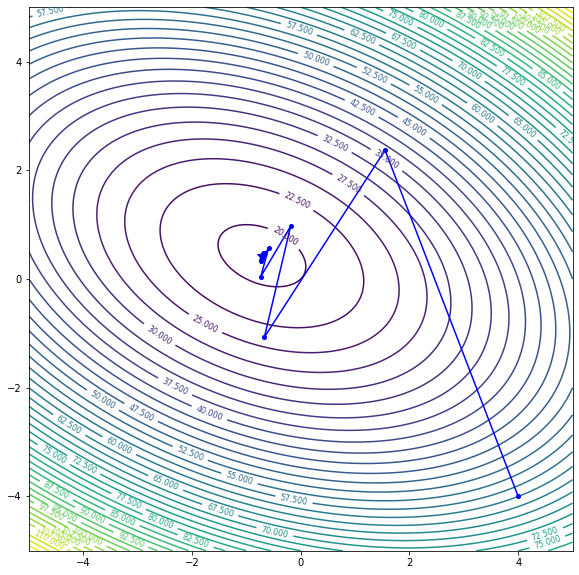

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(X, Y, Z, 40)
ax.clabel(CS, fontsize = 8)
X_list_rebroussement = [x_list_rebroussement[i][0] for i in range(len(x_list_rebroussement))]
Y_list_rebroussement = [x_list_rebroussement[i][1] for i in range(len(x_list_rebroussement))]
plt.plot(X_list_rebroussement, Y_list_rebroussement, marker = "o", ms = 4.0, color = "blue")
plt.plot(xstar_approx_rebroussement[0], xstar_approx_rebroussement[1], marker = '*', ms = 10.0, color = "blue")
ax.set_aspect('equal', adjustable = 'box')

On remarque qu'il n'y a plus la propriété d'orthogonalité de la trajectoire (propriété vraie ssi choix du pas optimal, cf cours).

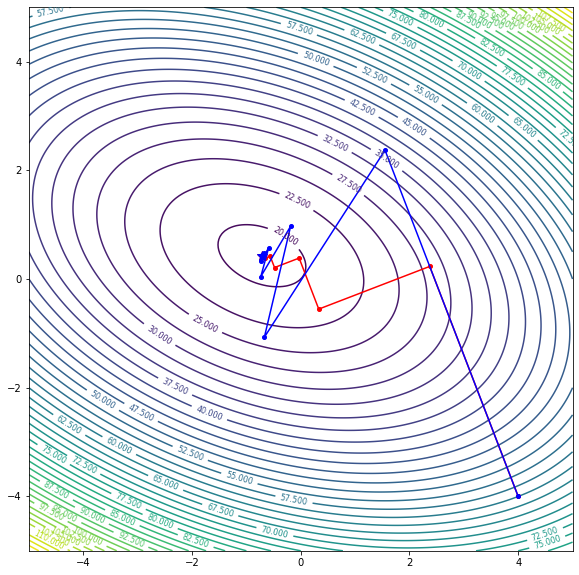

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(X, Y, Z, 40)
ax.clabel(CS, fontsize = 8)
plt.plot(X_list_optimal, Y_list_optimal, marker = "o", ms = 4.0, color = "red")
plt.plot(xstar_approx_optimal[0], xstar_approx_optimal[1], marker = '*', ms = 10.0, color = "r")
plt.plot(X_list_rebroussement, Y_list_rebroussement, marker = "o", ms = 4.0, color = "blue")
plt.plot(xstar_approx_rebroussement[0], xstar_approx_rebroussement[1], marker = '*', ms = 10.0, color = "blue")
ax.set_aspect('equal', adjustable = 'box')

9) Illustrer la convergence de l'algorithme de descente de gradient par rebroussement. On supperposera avec le graphe illustrant la convergence de l'algorithme de descente de gradient à pas optimal.

In [14]:
xstar_approx_rebroussement, x_list_rebroussement = descente_gradient_par_rebroussement(x0, f, gradf, .1, .7, 1e-7)

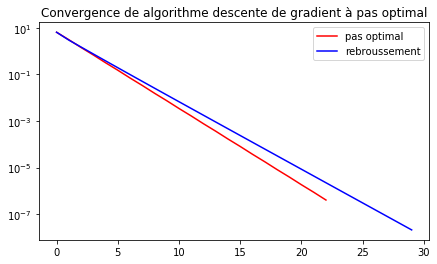

In [15]:
fig = plt.figure(figsize = (7, 4))
plt.semilogy([np.linalg.norm(x_list_optimal[i] - xstar_optimal) for i in range(len(x_list_optimal))], color = 'red', label = 'pas optimal')
plt.semilogy([np.linalg.norm(x_list_rebroussement[i] - xstar_optimal) for i in range(len(x_list_rebroussement))], color = 'blue', label = 'rebroussement') # on représente l'erreur entre chaque itéré et la
# valeur limite obtenue via la fonction semilogy qui met l'axe des ordonnées en échelle log.
plt.title('Convergence de algorithme descente de gradient à pas optimal')
plt.legend()
plt.show()

On remarque que l'on a convergence linéaire pour les deux méthodes comme prédit par le cours. La méthode par pas optimal est un peu plus rapide (par définition) mais l'écart n'est pas important. La méthode par rebroussement n'est pas si mauvaise surtout qu'en pratique on ne peut très souvent pas calculer le pas optimal.